### Exercise: energy consumption in building vs outside air temperature
The data provided in `buildingoat.csv` uses a dataset to model the Power of a building using the Outdoor Air Temperature (OAT) as an explanatory variable.  The **power** (Dutch: Vermogen), expressed in Watt (W),  of a building is a measure for the instantaneous energy comsumption.  Compare it to a light bulb of 10 W: if it is used for one hour it consumes 10 Wh (or 0.01 kWh) of electricity. On your electrity bill you are charged per kWh. Similarly, the power of a building in this exercise determines the energy consumption for heating.  A power of 160 kW (at a given outside temperature and a required inside temperature, which may vary during the day and week) means the building "looses" 160 kWh of heat energy per hour, which has to be provided by the heating installation to ensure a constant inside temperature.
  
Solve each subquestion in one cell.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import buildingoat.csv. Show the first 5 records

data = pd.read_csv('https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/buildingoat.csv')
data.head()

,Timestamp,OAT (F),Power (kW)
0,1/1/2010 1:15,51,165.1
1,1/1/2010 1:30,51,151.6
2,1/1/2010 1:45,51,146.9
3,1/1/2010 2:00,51,153.7
4,1/1/2010 2:15,51,153.8


The temperature is expressed degrees Fahrenheit (°F), which is used in the US. We can convert Fahrenheit to Celcius using the formula 

$°C = \frac{°F - 32}{1.8}$

Convert all values °F to °C. 

In [3]:
def Fahrenheit2Celcius(f):
    return (f - 32)/1.8

data['OAT (C)'] = (data['OAT (F)']).apply(Fahrenheit2Celcius)
print(data.head(10))
data.drop(['OAT (F)'],axis=1)

       Timestamp  OAT (F)  Power (kW)    OAT (C)
0  1/1/2010 1:15       51       165.1  10.555556
1  1/1/2010 1:30       51       151.6  10.555556
2  1/1/2010 1:45       51       146.9  10.555556
3  1/1/2010 2:00       51       153.7  10.555556
4  1/1/2010 2:15       51       153.8  10.555556
5  1/1/2010 2:30       51       159.0  10.555556
6  1/1/2010 2:45       51       157.7  10.555556
7  1/1/2010 3:00       51       163.2  10.555556
8  1/1/2010 3:15       50       151.7  10.000000
9  1/1/2010 3:30       50       148.7  10.000000


,Timestamp,Power (kW),OAT (C)
0,1/1/2010 1:15,165.1,10.555556
1,1/1/2010 1:30,151.6,10.555556
2,1/1/2010 1:45,146.9,10.555556
3,1/1/2010 2:00,153.7,10.555556
4,1/1/2010 2:15,153.8,10.555556
...,...,...,...
34935,12/30/2010 23:00,285.8,8.333333
34936,12/30/2010 23:15,206.6,6.666667
34937,12/30/2010 23:30,205.9,6.666667
34938,12/30/2010 23:45,189.4,6.666667


In [4]:
# Convert the type of Timestamp from 'object' to 'datetime'. This will change the format of Timestamp
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M')
data.head()

,Timestamp,OAT (F),Power (kW),OAT (C)
0,2010-01-01 01:15:00,51,165.1,10.555556
1,2010-01-01 01:30:00,51,151.6,10.555556
2,2010-01-01 01:45:00,51,146.9,10.555556
3,2010-01-01 02:00:00,51,153.7,10.555556
4,2010-01-01 02:15:00,51,153.8,10.555556


In [5]:
# Convert the type of Timetamp to String
data['Timestamp'] = data['Timestamp'].astype(str)
data.head()

,Timestamp,OAT (F),Power (kW),OAT (C)
0,2010-01-01 01:15:00,51,165.1,10.555556
1,2010-01-01 01:30:00,51,151.6,10.555556
2,2010-01-01 01:45:00,51,146.9,10.555556
3,2010-01-01 02:00:00,51,153.7,10.555556
4,2010-01-01 02:15:00,51,153.8,10.555556


In [6]:
# Give the dimensions of the dataset
data.shape

(34940, 4)

In [7]:
# Drop the rows that have columns with no available data
data = data.dropna()

In [8]:
# Give the dimensions of the dataset
data.shape

(34940, 4)

In [9]:
# Give the statistics of the dataset
data.describe()

,OAT (F),Power (kW),OAT (C)
count,34940.000000,34940.000000,34940.000000
mean,58.585690,261.644659,14.769828
std,8.739352,65.673392,4.855195
min,33.000000,0.000000,0.555556
25%,53.000000,194.600000,11.666667
50%,58.000000,276.700000,14.444444
75%,64.000000,312.300000,17.777778
max,100.000000,457.900000,37.777778


In [10]:
# You can see that the minimum value of Power (kW) is 0.0
# Calculate the mean and the standard deviation for Power (kW)
meanPower = data['Power (kW)'].mean()
stdPower = data['Power (kW)'].std()

print(meanPower)
print(stdPower)

261.64465941614196
65.67339168302733


In [11]:
# The 68-95-99.7 - rule in mind: drop all values that are more than 3 standard deviations from the mean
# This is a popular way of removing outliers from the dataset, which are often bad registrations. 
data = data[(data['Power (kW)'] >= (meanPower - 3 * stdPower)) & (data['Power (kW)'] <= (meanPower + 3 * stdPower))]
data

,Timestamp,OAT (F),Power (kW),OAT (C)
0,2010-01-01 01:15:00,51,165.1,10.555556
1,2010-01-01 01:30:00,51,151.6,10.555556
2,2010-01-01 01:45:00,51,146.9,10.555556
3,2010-01-01 02:00:00,51,153.7,10.555556
4,2010-01-01 02:15:00,51,153.8,10.555556
...,...,...,...,...
34935,2010-12-30 23:00:00,47,285.8,8.333333
34936,2010-12-30 23:15:00,44,206.6,6.666667
34937,2010-12-30 23:30:00,44,205.9,6.666667
34938,2010-12-30 23:45:00,44,189.4,6.666667


In [12]:
# Give the dimensions of the dataset
data.shape

(34913, 4)

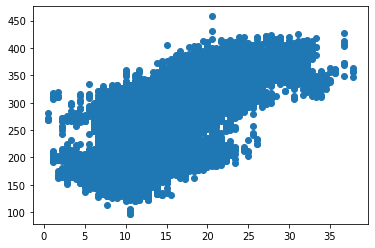

In [13]:
# Plot the Power (kW) versus the OAT (F)
plt.scatter(data['OAT (C)'], data['Power (kW)'])

In [14]:
# The Power is highly dependent on the month of the year, the day of the week and the time of the day
# We will use this information to incorporate it into our regression model.
# Add an extra column Month. The month has the integer value of the month (e.g. not 01, but 1)
data['Month'] = data['Timestamp'].str[5:7].astype(int)
data.head()

,Timestamp,OAT (F),Power (kW),OAT (C),Month
0,2010-01-01 01:15:00,51,165.1,10.555556,1
1,2010-01-01 01:30:00,51,151.6,10.555556,1
2,2010-01-01 01:45:00,51,146.9,10.555556,1
3,2010-01-01 02:00:00,51,153.7,10.555556,1
4,2010-01-01 02:15:00,51,153.8,10.555556,1


In [15]:
# Add an extra column Day. The day has the integer value of the day (e.g. not 01, but 1)
data['Day'] = data['Timestamp'].str[8:10].astype(int)
data.head()

,Timestamp,OAT (F),Power (kW),OAT (C),Month,Day
0,2010-01-01 01:15:00,51,165.1,10.555556,1,1
1,2010-01-01 01:30:00,51,151.6,10.555556,1,1
2,2010-01-01 01:45:00,51,146.9,10.555556,1,1
3,2010-01-01 02:00:00,51,153.7,10.555556,1,1
4,2010-01-01 02:15:00,51,153.8,10.555556,1,1


In [16]:
# Add an extra column Hour. The Hour has the integer value of the hour (e.g. not 01, but 1)
data['Hour'] = data['Timestamp'].str[11:13].astype(int)
data.head()

,Timestamp,OAT (F),Power (kW),OAT (C),Month,Day,Hour
0,2010-01-01 01:15:00,51,165.1,10.555556,1,1,1
1,2010-01-01 01:30:00,51,151.6,10.555556,1,1,1
2,2010-01-01 01:45:00,51,146.9,10.555556,1,1,1
3,2010-01-01 02:00:00,51,153.7,10.555556,1,1,2
4,2010-01-01 02:15:00,51,153.8,10.555556,1,1,2


In [17]:
# Select the data of 1 specific day (e.g. 2010-03-04)
day = data[data['Timestamp'].str[0:10] == '2010-03-04']
day.head(20)

,Timestamp,OAT (F),Power (kW),OAT (C),Month,Day,Hour
5947,2010-03-04 00:00:00,45,164.2,7.222222,3,4,0
5948,2010-03-04 00:15:00,44,164.2,6.666667,3,4,0
5949,2010-03-04 00:30:00,44,160.7,6.666667,3,4,0
5950,2010-03-04 00:45:00,44,174.0,6.666667,3,4,0
5951,2010-03-04 01:00:00,44,186.2,6.666667,3,4,1
5952,2010-03-04 01:15:00,45,179.5,7.222222,3,4,1
5953,2010-03-04 01:30:00,45,168.2,7.222222,3,4,1
5954,2010-03-04 01:45:00,45,167.0,7.222222,3,4,1
5955,2010-03-04 02:00:00,45,177.5,7.222222,3,4,2
5956,2010-03-04 02:15:00,46,181.8,7.777778,3,4,2


Text(0, 0.5, 'OAT')

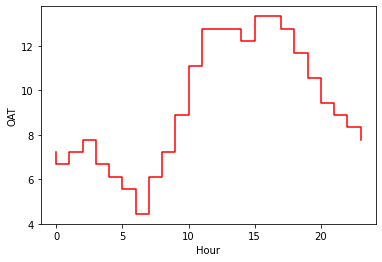

In [18]:
# Plot for that day the OAT (C) versus the Hour of day
plt.plot(day['Hour'], day['OAT (C)'], color='red')
plt.xlabel('Hour')
plt.ylabel('OAT')

Text(0, 0.5, 'Power')

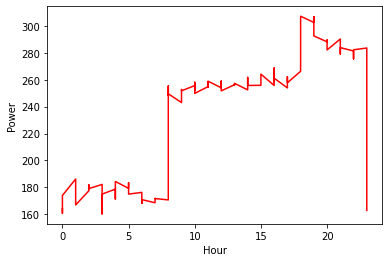

In [19]:
# Plot the Power (kW) versus the Hour of day
# This clearly illustrates people require less heating at night. 
plt.plot(day['Hour'], day['Power (kW)'], color='red')
plt.xlabel('Hour')
plt.ylabel('Power')

In [20]:
# Use RandomForestRegressor to predict the Power (kW)
# find the optimal number of trees based on MAE

In [21]:
from sklearn.model_selection import train_test_split
X = data.drop(['Timestamp','Power (kW)'],axis=1)
y = data['Power (kW)']

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

X_remainder, X_test, y_remainder, y_test = train_test_split(X,y,test_size=0.30)

best_MAE = 1000
best_trees = 0

for trees in range(50,500,50):
    X_train, X_validation, y_train, y_validation = train_test_split(X_remainder,y_remainder,test_size=0.30)
    model = RandomForestRegressor(n_estimators=trees)

    model.fit(X_train, y_train)    
    y_validation2 = model.predict(X_validation)
    MAE = mean_absolute_error(y_validation, y_validation2)
    if MAE < best_MAE:
        best_MAE = MAE
        best_trees = trees
        best_validation = model.predict(X_test)
        
print('Optimal number of trees = % s' %(best_trees))
print('MAE on validation set = % 3.2f' % (best_MAE)) 
MAEOnTestSet = mean_absolute_error(y_test, best_validation)
print('MAE on test set = % 3.2f' % (MAEOnTestSet))
r2 = r2_score(y_test,best_validation)
print('R square: ' + str(r2))   

Optimal number of trees = 350
MAE on validation set =  10.11
MAE on test set =  10.20
R square: 0.9245715170611813


In [22]:
# Use Multiple Polynomial Regression to predict the Power (kW) 
# Find the optimal polynomial degree based on MAE
# Compare the MAE to Random Forest

In [23]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

MAE = 100000
# initialize bestmodel
bestmodel = 1

for i in range(1,10):
    poly = PolynomialFeatures(degree=i)
    X_train_transform = poly.fit_transform(X_train)
    X_test_transform = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    y_predict = model.predict(X_test_transform)    
    NEWMAE = mean_absolute_error(y_test,y_predict)
    if NEWMAE < MAE: 
        MAE = NEWMAE
        bestmodel = i

print('Bestmodel: ' + str(bestmodel))
print('Mean Absolute Error: '+ str(MAE))
r2 = r2_score(y_test,y_predict)
print('R square: ' + str(r2))             

Bestmodel: 9
Mean Absolute Error: 15.874606051764331
R square: 0.8742358238851702
